DISTANCIA EUCLIDIANA

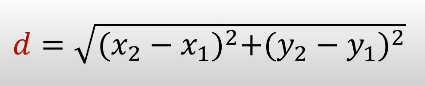

Grupo 1:
[[185  72]
 [179  68]
 [182  72]
 [188  77]]

Grupo 2:
[[170  56]
 [168  60]]

Centro del Grupo 1: [183.5   72.25]
Centro del Grupo 2: [169.  58.]


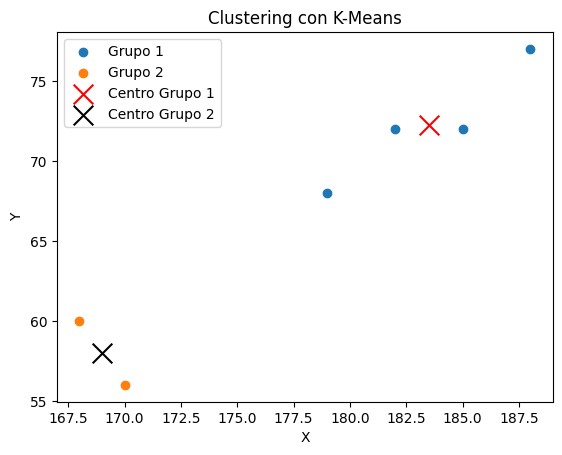

In [ ]:
# Importamos las bibliotecas NumPy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada: coordenadas x e y de los puntos
x = np.array([185, 170, 168, 179, 182, 188])
y = np.array([72, 56, 60, 68, 72, 77])

# Inicialización de los centros de grupos (podrían ser elegidos al azar)
centro1 = (185, 72)
centro2 = (170, 56)

# Número máximo de iteraciones
max_iteraciones = 100

# Inicia un bucle que realizará el algoritmo K-Means hasta que se alcance un número máximo de iteraciones
for _ in range(max_iteraciones):
    # Calcula las distancias euclidianas entre los puntos y los centros de los grupos
    distancias1 = np.sqrt((x - centro1[0])**2 + (y - centro1[1])**2)
    distancias2 = np.sqrt((x - centro2[0])**2 + (y - centro2[1])**2)

    # Asigna los puntos al grupo más cercano basado en las distancias
    grupo1 = np.column_stack((x[distancias1 < distancias2], y[distancias1 < distancias2]))
    grupo2 = np.column_stack((x[distancias1 >= distancias2], y[distancias1 >= distancias2]))

    # Calcula los nuevos centros de los grupos como el promedio de los puntos asignados a cada grupo
    nuevo_centro1 = np.mean(grupo1, axis=0)
    nuevo_centro2 = np.mean(grupo2, axis=0)

    # Comprueba si los centros de los grupos han convergido (no cambian)
    if np.array_equal(centro1, nuevo_centro1) and np.array_equal(centro2, nuevo_centro2):
        break

    # Actualiza los centros de los grupos
    centro1 = nuevo_centro1
    centro2 = nuevo_centro2

# Imprime los puntos asignados a cada grupo y los centros finales
print("Grupo 1:")
print(grupo1)

print("\nGrupo 2:")
print(grupo2)

print("\nCentro del Grupo 1:", centro1)
print("Centro del Grupo 2:", centro2)

# Grafica los resultados utilizando Matplotlib
plt.scatter(grupo1[:, 0], grupo1[:, 1], label='Grupo 1')
plt.scatter(grupo2[:, 0], grupo2[:, 1], label='Grupo 2')
plt.scatter(centro1[0], centro1[1], c='red', marker='x', s=200, label='Centro Grupo 1')
plt.scatter(centro2[0], centro2[1], c='black', marker='x', s=200, label='Centro Grupo 2')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Clustering con K-Means')
plt.show()


DISTANCIA DE MANHATTAN

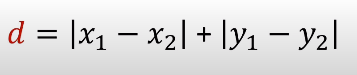

Cluster 1:
[185  72]
[179  68]
[182  72]
[188  77]
Cluster 2:
[170  56]
[168  60]

Centroides:
[183.5   72.25]
[169.  58.]


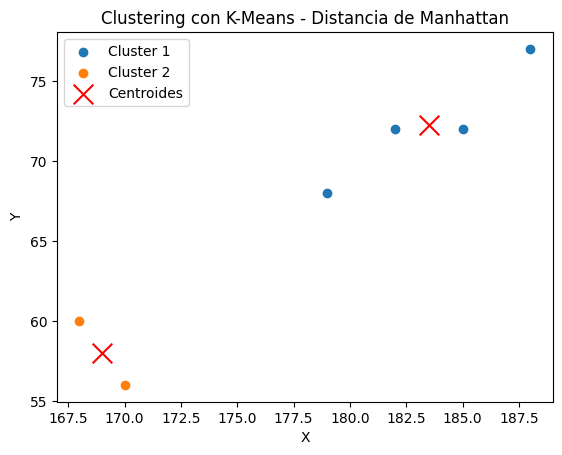

In [ ]:
# Importamos las bibliotecas NumPy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función manhattan_distance para calcular la distancia de Manhattan entre dos puntos
def manhattan_distance(point1, point2):
    return np.abs(point1[0] - point2[0]) + np.abs(point1[1] - point2[1])

# Función assign_to_clusters para asignar puntos a los clusters
def assign_to_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in data:
        # Calculamos la distancia de Manhattan entre el punto y todos los centroides
        distances = [manhattan_distance(point, centroid) for centroid in centroids]
        # Asignamos el punto al clúster cuyo centroide tiene la menor distancia de Manhattan
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)
    return clusters

# Función update_centroids para recalcular los centroides
def update_centroids(clusters):
    # Calculamos los nuevos centroides como el promedio de los puntos en cada clúster
    centroids = [np.mean(cluster, axis=0) for cluster in clusters]
    return centroids

# Función K-Means
def k_means(data, centroids, max_iterations=100):
    for _ in range(max_iterations):
        # Asignamos puntos a los clústeres
        clusters = assign_to_clusters(data, centroids)
        # Recalculamos los centroides
        new_centroids = update_centroids(clusters)
        # Comprobamos si los centroides han convergido (no cambian)
        if np.array_equal(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

# Datos de entrada (coordenadas x e y de los puntos)
x = np.array([185, 170, 168, 179, 182, 188])
y = np.array([72, 56, 60, 68, 72, 77])

# Inicialización de los centros de grupos (centroides)
centro1 = (185, 72)
centro2 = (170, 56)
centroids = np.array([centro1, centro2])

# Combinamos los datos x e y en un solo conjunto de datos
data = np.array(list(zip(x, y)))

# Ejecutamos el algoritmo K-Means para dividir los datos en 2 clusters
k = 2  # Número de clusters
centroids, clusters = k_means(data, centroids)

# Imprimimos los puntos asignados a cada clúster y los centroides
for i, cluster in enumerate(clusters):
    print(f'Cluster {i + 1}:')
    for point in cluster:
        print(point)

print('\nCentroides:')
for centroid in centroids:
    print(centroid)

# Graficamos los resultados utilizando Matplotlib
for i, cluster in enumerate(clusters):
    cluster_data = np.array(cluster)
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')

# Corrección: Convertimos la lista de centroides en un array NumPy
centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroides')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Clustering con K-Means - Distancia de Manhattan')
plt.show()


CORRELACION DE PEARSON

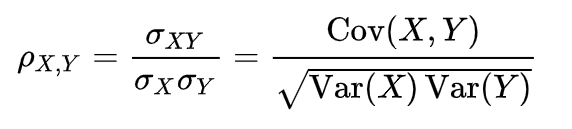

In [ ]:
import numpy as np

# Importamos la biblioteca NumPy

# Datos de entrada: coordenadas x e y de los puntos
x = np.array([185, 170, 168, 179, 182, 188])
y = np.array([72, 56, 60, 68, 72, 77])

# Función para calcular la correlación de Pearson
def pearson_correlation(x, y):
    # Calculamos la media de x e y
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculamos la desviación estándar de x e y
    std_x = np.std(x)
    std_y = np.std(y)

    # Calculamos la covarianza entre x e y
    covariance = np.mean((x - mean_x) * (y - mean_y))

    # Verificamos si la desviación estándar de x o y es igual a cero para evitar la división por cero
    if std_x == 0 or std_y == 0:
        return 0
    else:
        # Calculamos la correlación de Pearson utilizando la fórmula
        return covariance / (std_x * std_y)

# Calculamos la correlación de Pearson entre x e y llamando a la función
correlation = pearson_correlation(x, y)

# Imprimimos el valor de la correlación de Pearson en la pantalla
print("Correlación de Pearson:", correlation)


Correlación de Pearson: 0.9647705683244996


SIMILITUD DE COSENO

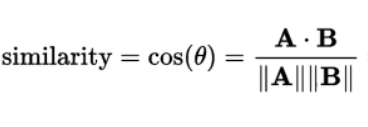

Cluster 1:
[185  72]
[179  68]
[182  72]
[188  77]
Cluster 2:
[170  56]
[168  60]

Centroides:
[183.5   72.25]
[169.  58.]


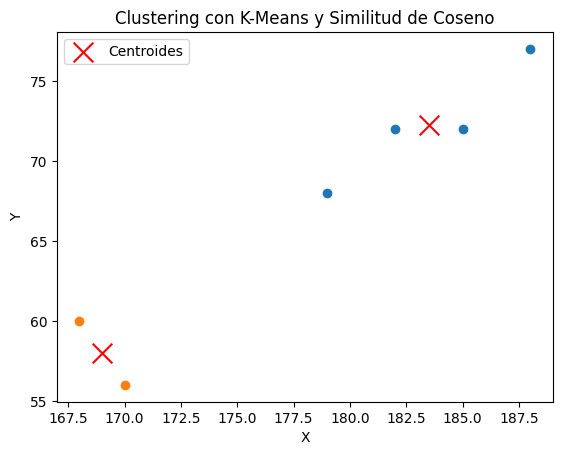

In [ ]:
# Importamos las bibliotecas NumPy y Matplotlib.
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada (vectores en un espacio multidimensional)
data = np.array([
    [185, 72],
    [170, 56],
    [168, 60],
    [179, 68],
    [182, 72],
    [188, 77]
])

# Definimos un conjunto de datos llamado 'data', que contiene vectores multidimensionales.
# Cada fila representa un punto en un espacio multidimensional con dos características (en este caso, altura y peso).

# Inicialización de los centros de grupos
centro1 = [185, 72]
centro2 = [170, 56]
centroids = [centro1, centro2]

# Inicializamos los centroides para el algoritmo de clustering. En este caso, tenemos dos centroides: centro1 y centro2.
# Cada centro es un punto en el mismo espacio multidimensional que los datos de entrada.

# Función para calcular la similitud de coseno entre dos vectores
def cosine_similarity(vector1, vector2):
    # Calculamos el producto punto entre los dos vectores
    dot_product = np.dot(vector1, vector2)

    # Calculamos la norma (longitud) de cada vector utilizando la función np.linalg.norm
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)

    # Calculamos la similitud del coseno dividiendo el producto punto por el producto de las normas
    similarity = dot_product / (norm_vector1 * norm_vector2)

    # Devolvemos el valor de similitud calculado
    return similarity

# Función para asignar puntos a los clusters
def assign_to_clusters(data, centroids):
    # Inicializamos una lista llamada 'clusters' con una sublista para cada clúster.
    clusters = [[] for _ in range(len(centroids))]

    # Iteramos a través de cada punto en los datos de entrada.
    for point in data:
        # Calculamos las similitudes de coseno entre el punto y cada centroide utilizando la función 'cosine_similarity'.
        similarities = [cosine_similarity(point, centroid) for centroid in centroids]

        # Encontramos el índice del clúster al que el punto tiene la mayor similitud de coseno.
        cluster_index = np.argmax(similarities)

        # Agregamos el punto al clúster correspondiente.
        clusters[cluster_index].append(point)

    # Devolvemos una lista de listas, donde cada lista representa un clúster con sus puntos asignados.
    return clusters

# Función para recalcular los centroides
def update_centroids(clusters):
    # Calculamos los nuevos centroides tomando la media de los puntos en cada clúster.
    centroids = [np.mean(cluster, axis=0) for cluster in clusters]

    # Devolvemos la lista de los nuevos centroides.
    return centroids


# Función de K-Means
def k_means(data, centroids, max_iterations=100):
    for _ in range(max_iterations):
        # Asigna puntos a los clústeres utilizando la función assign_to_clusters
        clusters = assign_to_clusters(data, centroids)

        # Recalcula los centroides utilizando la función update_centroids
        new_centroids = update_centroids(clusters)

        # Comprueba si los centroides han convergido (no cambian significativamente)
        if np.array_equal(centroids, new_centroids):
            break

        # Actualiza los centroides para la próxima iteración
        centroids = new_centroids

    # Retorna los centroides finales y la asignación de puntos a clústeres
    return centroids, clusters


# Ejecutar K-Means con similitud de coseno
k = 2  # Número de clusters
centroids, clusters = k_means(data, centroids)

# Imprimir los resultados
for i, cluster in enumerate(clusters):
    # Itera a través de cada clúster y su índice (i).
    print(f'Cluster {i + 1}:')
    for point in cluster:
        # Imprime los puntos en el clúster actual.
        print(point)

print('\nCentroides:')
for centroid in centroids:
    # Imprime los centroides finales.
    print(centroid)

# Graficar los resultados
for cluster in clusters:
    cluster_data = np.array(cluster)
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1])

centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Clustering con K-Means y Similitud de Coseno')
plt.show()
